In [22]:
source('./data_processing.R')


In [17]:
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# Replicate1

In [23]:
input_dir = './GiRAFR_outputs/Alda-Catalinas_CellSystems/sample1/'
output_dir = './figures_results/Alda-Catalinas_CellSystems/sample1'


### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 103572"
[1] "Wildtype UMI: 125133"
[1] "Mutant UMI: 157815"


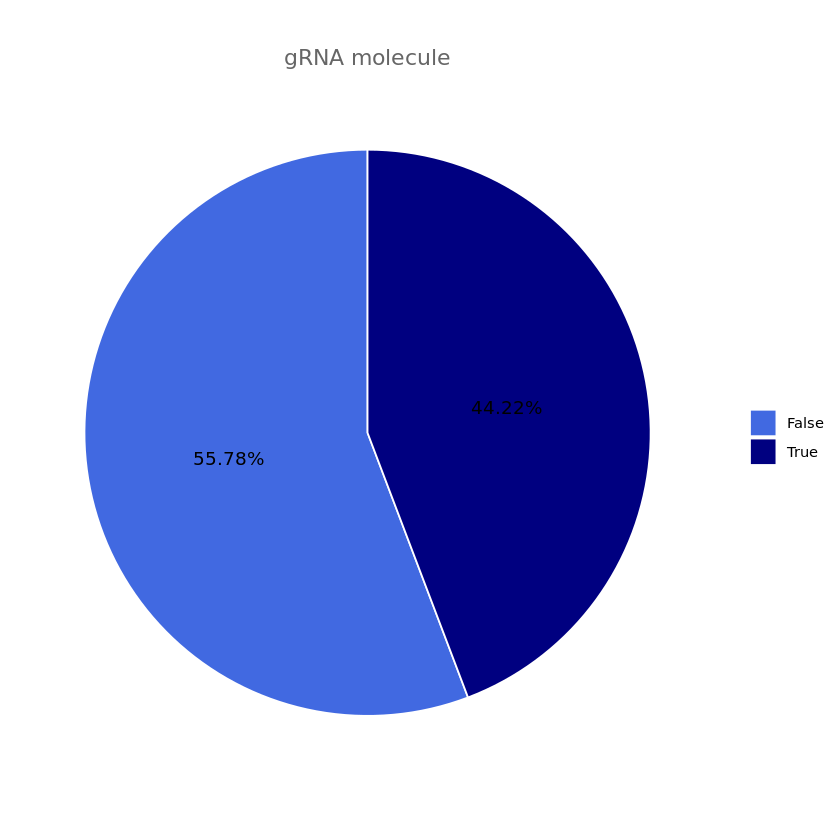

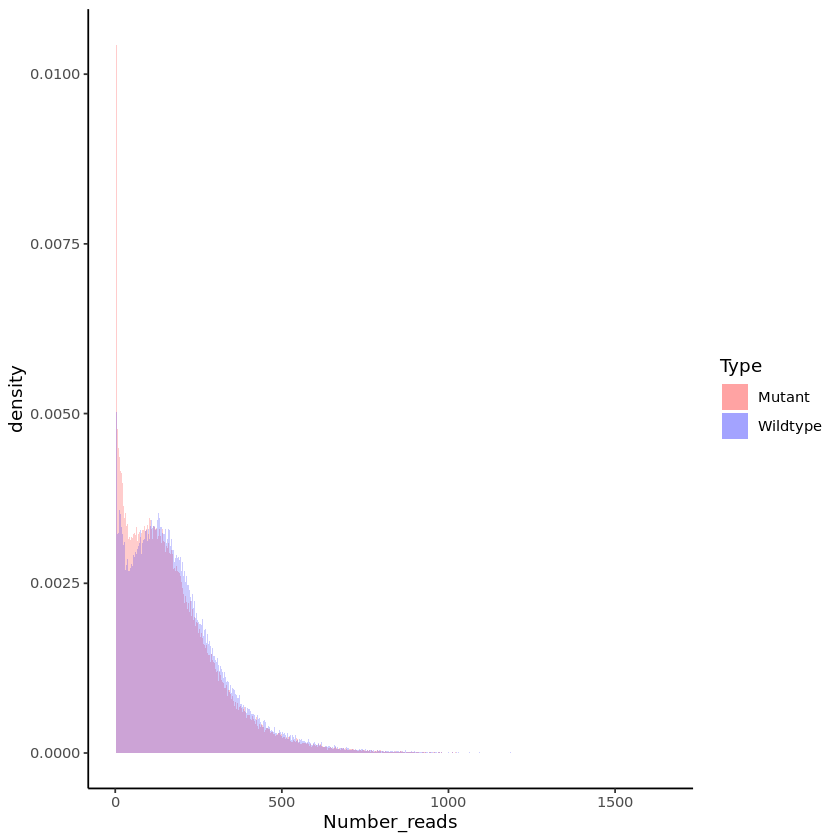

In [4]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


In [235]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
index <- which(gRNA_UMI_variant$Type == 'False' & !grepl('TSO',gRNA_UMI_variant$Mutation))
index <- index[!grepl('gRNA:0', tmp$Mutation)]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

[1] 520040

[1] 5006223

In [27]:
library(stringr)

In [70]:
gRNA_UMI_variant.MT <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),]
index <- which(gRNA_UMI_variant$Type == 'False')
index <- index[lapply(str_extract_all(gRNA_UMI_variant.MT$Mutation, regex("\\d+")), max) < 60]
gRNA_UMI_variant.MT <- gRNA_UMI_variant.MT[lapply(str_extract_all(gRNA_UMI_variant.MT$Mutation, regex("\\d+")), max) < 60,]
nrow(gRNA_UMI_variant.MT) # position Rest < 60
nrow(gRNA_UMI_variant) - nrow(gRNA_UMI_variant.MT)

[1] 29722

[1] 253226

In [77]:
head(index)

[1] 14 24 25 39 45 65

In [88]:
index <- index[!is.na(index)]

In [90]:
gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

False 
10.50122

True 
89.49878

[1] "Number of mutant UMI"
[1] "Processed cell number: 103572"
[1] "Wildtype UMI: 253235"
[1] "Mutant UMI: 29713"


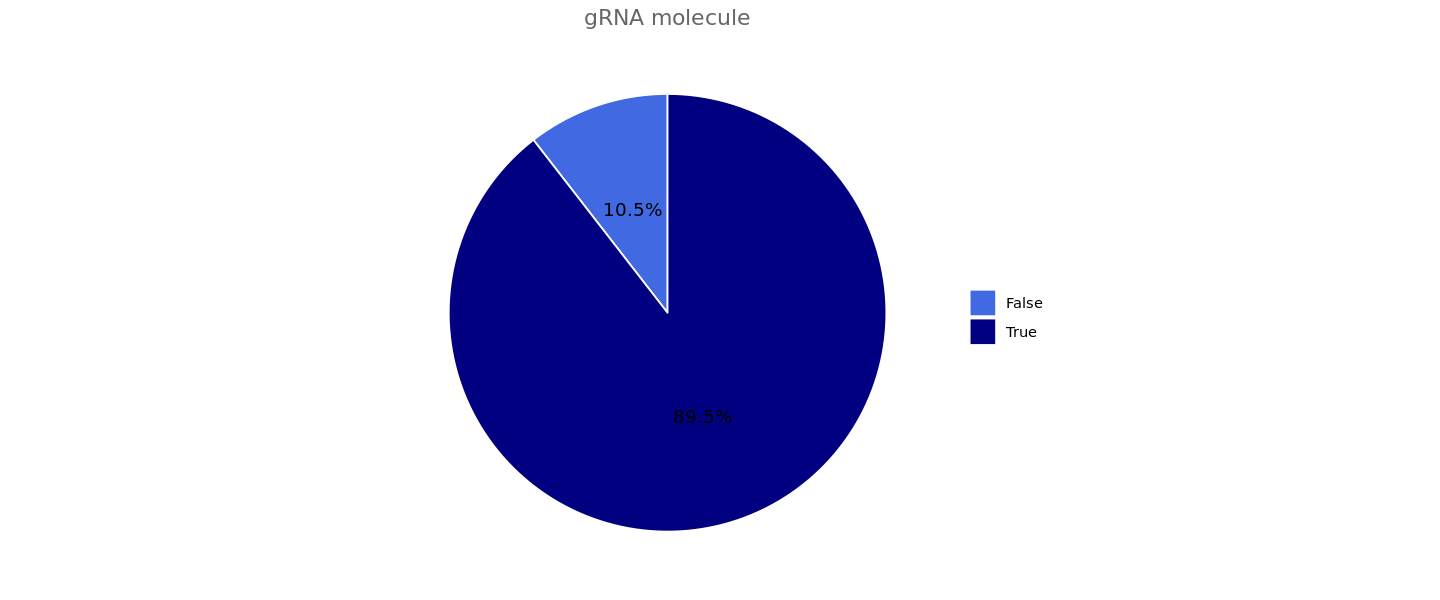

png 
  2

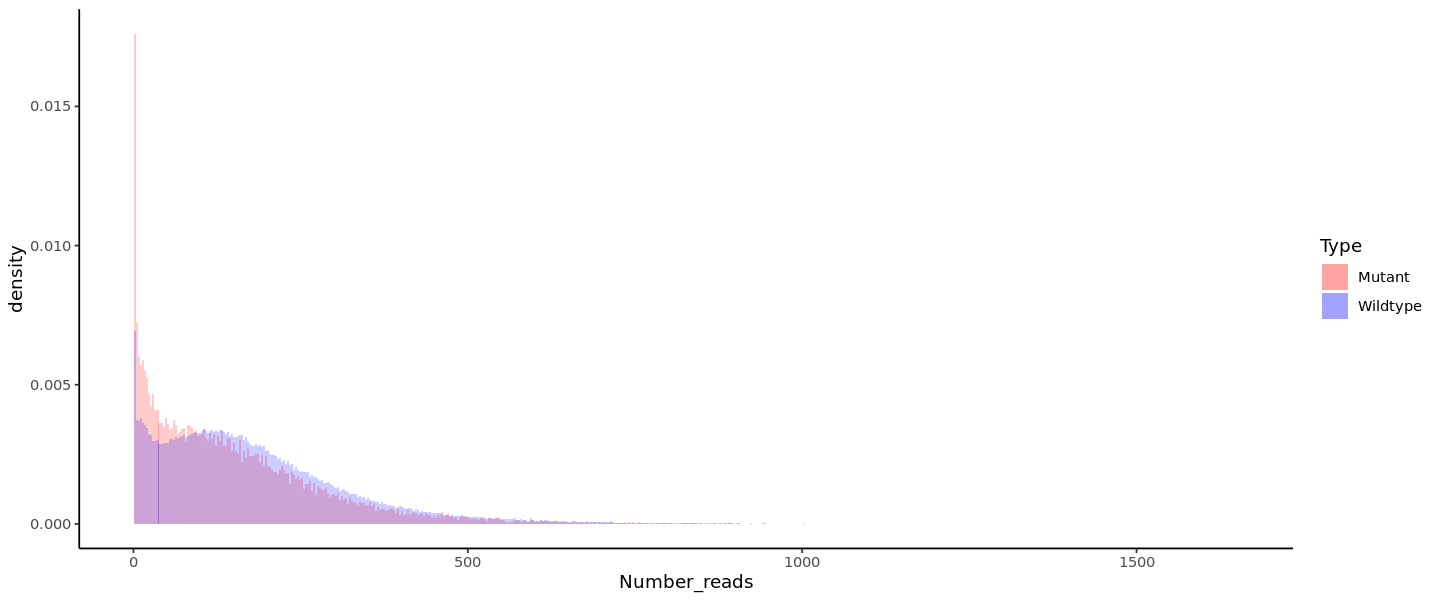

In [91]:
Freq = table(gRNA_UMI_variant$Type)
Freq[1] / (Freq[1] + Freq[2]) * 100
Freq[2] / (Freq[1] + Freq[2]) * 100

print('Number of mutant UMI')
print(paste0('Processed cell number: ' ,length(unique(gRNA_UMI_variant$CB))))
print(paste0('Wildtype UMI: ', Freq[2]))
print(paste0('Mutant UMI: ', Freq[1]))
#table(gRNA_UMI_variant$Type)

Freq.df = as.data.frame(table(gRNA_UMI_variant$Type))
colnames(Freq.df) <- c('Type','Number')

value = Freq.df$Number/sum(Freq.df$Number)

pie = ggplot(Freq.df, aes(x="", y=Number, fill=Type)) + geom_bar(stat="identity", width=1, color = 'white')
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(value*100, digit =2), "%")), 
                                              position = position_stack(vjust = 0.5))
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "gRNA molecule")
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("royalblue", "navy")) 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(hjust = 0.5, color = "#666666"))
print(pie)
p  <- ggplot(gRNA_UMI_variant, aes(x = Number_reads, fill = Type)) +
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),],
               aes(x= Number_reads, y = ..density.. ), alpha = 0.2,binwidth = 3)+
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'True'),],
               aes(x= Number_reads, y = ..density..), alpha = 0.2,binwidth = 3)+theme_classic()+
scale_fill_manual(name="Type", values=c("red","blue"),labels=c("Mutant","Wildtype"))
print(p)
save_pdf <- paste0(output_dir,'.UMI_MT.pdf')
pdf(save_pdf, height = 8, width = 8)
print(pie)
print(p)
dev.off()


### source of mutation

In [ ]:
#consensus.count.matrix <- source_mutation(input_dir)


### MT.txt

[1] "MT mutation table"

    A     C  D(1) D(11) D(12) D(13) D(14) D(18) D(19)  D(2)  D(3)  D(4)  D(5) 
 6346  5705   968     2     3     2     3     1     4   119    28    16    11 
 D(6)  D(7)  D(8)     G  I(1) I(11)  I(2)  I(3)  I(4)  I(5)  I(6)     T 
    1     5     2  5234 11173     1   959    20     6     1     3  5673 
[1] "MT mutation type"

    D     I     S 
 1165 12163 22958 
[1] "MT mutation structure"

 gRNA  Rest    U6 
 6283 29646   357 


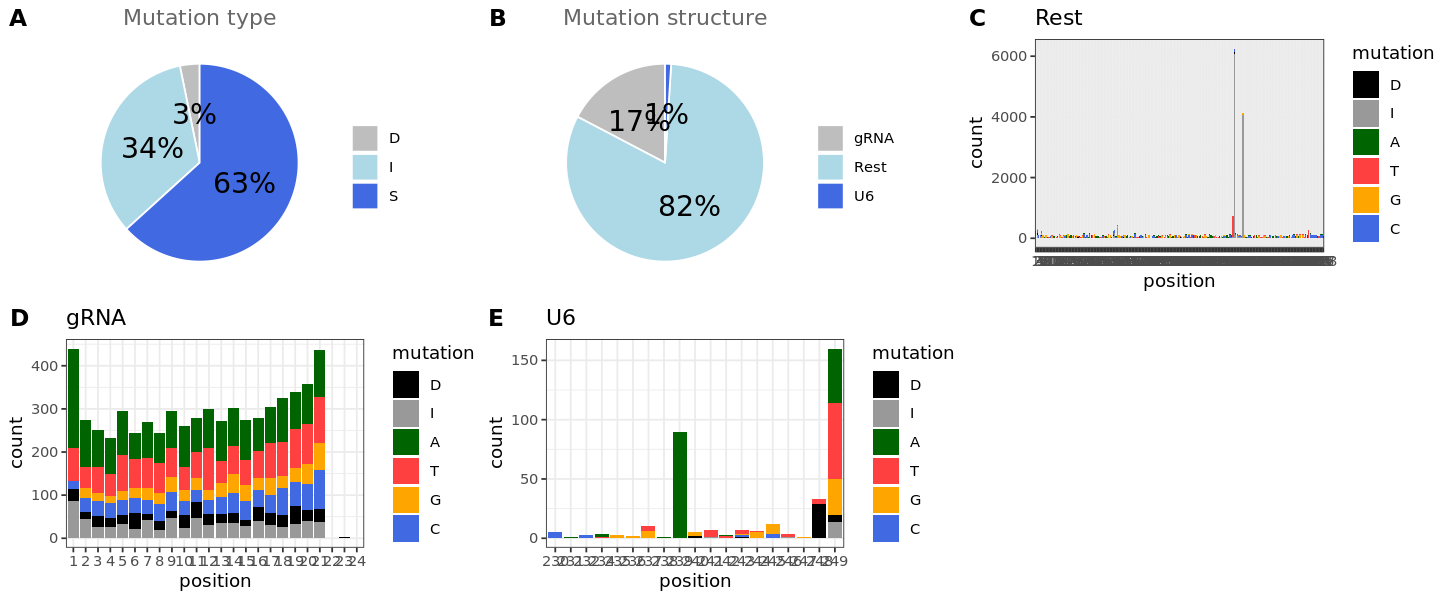

In [24]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [25]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.658   2.000  11.000 

In [21]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TGTGGAAAGGACGAAACACCGNNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAGGCCAACATGAGGATCACCCATG')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,400))

dev.off()

Warning message:
“Removed 26023 rows containing non-finite values (stat_count).”
Warning message:
“Removed 26023 rows containing non-finite values (stat_count).”


png 
  2